In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [77]:
import warnings
warnings.filterwarnings("ignore")

In [78]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 

# data (as pandas dataframes) 
X = adult.data.features 
Y = adult.data.targets

In [79]:
df = pd.DataFrame(data=X, columns=adult.data.feature_names)
df['income'] = Y

Rows and Columns

In [80]:
df.shape

(48842, 15)

In [81]:
df.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [82]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [83]:
df.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [84]:
df.duplicated().sum()

29

In [85]:
label_encoder = LabelEncoder()
df['income'] = label_encoder.fit_transform(df['income'])

In [86]:
# Fill missing numerical values with the mean (consider other strategies if needed)
imputer = SimpleImputer(strategy='mean')
df[['age', 'income', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
    'hours-per-week']] = imputer.fit_transform(
    df[['age', 'income', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']])

In [87]:
categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
labEnc = LabelEncoder()
for col in categorical_cols:
  df[col] = labEnc.fit_transform(df[col])

In [88]:
# check for missing values in the dataset
if df.isnull().values.any():
    print("There are missing values in the dataset.")
else:
    print("No missing values in the dataset.")

No missing values in the dataset.


In [89]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [90]:
df.nunique()

age                  74
workclass            10
fnlwgt            28523
education            16
education-num        16
marital-status        7
occupation           16
relationship          6
race                  5
sex                   2
capital-gain        123
capital-loss         99
hours-per-week       96
native-country       43
income                4
dtype: int64

In [91]:
df.describe().T  # Transposed

,count,mean,std,min,25%,50%,75%,max
age,48842.0,38.643585,13.710510,17.0,28.0,37.0,48.0,90.0
workclass,48842.0,4.047889,1.528374,0.0,4.0,4.0,4.0,9.0
fnlwgt,48842.0,189664.134597,105604.025423,12285.0,117550.5,178144.5,237642.0,1490400.0
education,48842.0,10.288420,3.874492,0.0,9.0,11.0,12.0,15.0
education-num,48842.0,10.078089,2.570973,1.0,9.0,10.0,12.0,16.0
marital-status,48842.0,2.618750,1.507703,0.0,2.0,2.0,4.0,6.0
occupation,48842.0,6.874370,4.284442,0.0,3.0,7.0,10.0,15.0
relationship,48842.0,1.443287,1.602151,0.0,0.0,1.0,3.0,5.0
race,48842.0,3.668052,0.845986,0.0,4.0,4.0,4.0,4.0
sex,48842.0,0.668482,0.470764,0.0,0.0,1.0,1.0,1.0


Value Count Function

In [92]:
df['workclass'].value_counts()

workclass
4    33906
6     3862
2     3136
7     1981
0     1836
5     1695
1     1432
9      963
8       21
3       10
Name: count, dtype: int64

In [93]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [94]:
df['occupation'].value_counts()

occupation
10    6172
3     6112
4     6086
1     5611
12    5504
8     4923
7     3022
14    2355
6     2072
0     1843
5     1490
13    1446
11     983
15     966
9      242
2       15
Name: count, dtype: int64

In [95]:
df['native-country'].value_counts()

native-country
39    43832
26      951
0       583
30      295
42      274
11      206
33      184
2       182
8       155
19      151
5       138
9       127
3       122
35      115
23      106
22      105
6       103
24       92
13       88
31       87
40       86
4        85
14       75
32       67
36       65
20       59
12       49
27       49
29       46
7        45
10       38
21       37
17       30
37       30
1        28
38       27
28       23
25       23
41       23
34       21
16       20
18       19
15        1
Name: count, dtype: int64

In [96]:
df['income'].value_counts()

income
0.0    24720
1.0    12435
2.0     7841
3.0     3846
Name: count, dtype: int64

<Axes: xlabel='income', ylabel='count'>

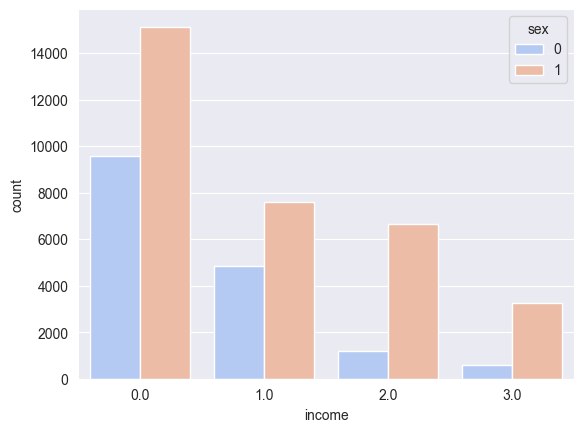

In [97]:
sns.countplot(x='income', data=df, hue='sex', palette='coolwarm')

In [99]:
import pandas as pd
import numpy as np

def check_for_question_marks(df):
    cols_with_question_marks = []
    for col in df.columns:
        if df[col].dtype == object:
            # For string columns
            if df[col].str.contains('?').any():
                cols_with_question_marks.append(col)
        else:
            # For non-string columns
            if (df[col] == '?').any():
                cols_with_question_marks.append(col)
    return cols_with_question_marks

# Assuming your DataFrame is named 'df'
columns_with_question_marks = check_for_question_marks(df)

if columns_with_question_marks:
    print("The following columns contain '?' entries:")
    for col in columns_with_question_marks:
        print(f"- {col}")
else:
    print("No columns contain '?' entries.")

No columns contain '?' entries.


Fill the ? with the mode

In [72]:
mode_workclass = df['workclass'].mode()[0]
print(f"The mode of 'workclass' is: {mode_workclass}")

The mode of 'workclass' is: 4


In [73]:
df['workclass'] = df['workclass'].replace('?', mode_workclass)

In [74]:
mode_occupation = df['occupation'].mode()[0]
print(f"The mode of 'occupation' is: {mode_occupation}")

The mode of 'occupation' is: 10


In [75]:
df['occupation'] = df['occupation'].replace('?', mode_occupation)

In [101]:
mode_ntv_country = df['native-country'].mode()[0]
print(f"The mode of 'native-country' is: {mode_ntv_country}")

The mode of 'native-country' is: 39


In [102]:
df['native-country'] = df['native-country'].replace('?', mode_ntv_country)

In [105]:
df.head(10)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39.0,7,77516.0,9,13.0,4,1,1,4,1,2174.0,0.0,40.0,39,0.0
1,50.0,6,83311.0,9,13.0,2,4,0,4,1,0.0,0.0,13.0,39,0.0
2,38.0,4,215646.0,11,9.0,0,6,1,4,1,0.0,0.0,40.0,39,0.0
3,53.0,4,234721.0,1,7.0,2,6,0,2,1,0.0,0.0,40.0,39,0.0
4,28.0,4,338409.0,9,13.0,2,10,5,2,0,0.0,0.0,40.0,5,0.0
5,37.0,4,284582.0,12,14.0,2,4,5,4,0,0.0,0.0,40.0,39,0.0
6,49.0,4,160187.0,6,5.0,3,8,1,2,0,0.0,0.0,16.0,23,0.0
7,52.0,6,209642.0,11,9.0,2,4,0,4,1,0.0,0.0,45.0,39,2.0
8,31.0,4,45781.0,12,14.0,4,10,1,4,0,14084.0,0.0,50.0,39,2.0
9,42.0,4,159449.0,9,13.0,2,4,0,4,1,5178.0,0.0,40.0,39,2.0


Feature Engineering

In [ ]:
# Education category

df.education = df.education.replace([''])